# Tugas 2

In [26]:
import pandas as pd

df = pd.read_csv('data/data.csv', sep=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


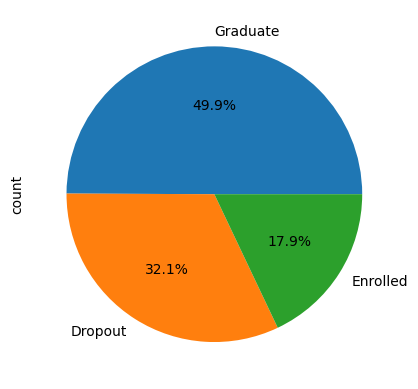

In [27]:
# visualizing target class distribution
import matplotlib.pyplot as plt

df['Target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [29]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [30]:
# label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])

df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [31]:
benchmark = []

In [32]:
# logistic regression original dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

df_X = df.drop('Target', axis=1)
df_y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Logistic Regression (Original Dataset)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.6587570621468927
Precision: 0.5595983554712207
Recall: 0.5200971444149282


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# logistic regression with under-sampling
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Logistic Regression (Under-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.6268343815513627
Precision: 0.624316325934823
Recall: 0.6244325686963964


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# logistic regression with over-sampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(random_state=42)

X_over, y_over = over_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Logistic Regression (Over-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.5761689291101055
Precision: 0.5795453033642632
Recall: 0.5758022120188341


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# logistic regression with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Logistic Regression (SMOTE)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.6289592760180995
Precision: 0.6316331950086371
Recall: 0.6287171286117177


/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# logistic regression with ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = adasyn.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Logistic Regression (ADASYN)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5976653696498054
Precision: 0.595913262163445
Recall: 0.594274057804543


In [37]:
# decision tree original dataset
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Decision Tree (Original Dataset)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.6870056497175141
Precision: 0.6278233821594714
Recall: 0.6255547007727673


In [38]:
# decision tree with under-sampling
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Decision Tree (Under-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.5911949685534591
Precision: 0.5945388377799753
Recall: 0.5905036318261189


In [39]:
# decision tree with over-sampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(random_state=42)

X_over, y_over = over_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Decision Tree (Over-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8363499245852187
Precision: 0.8394975394180438
Recall: 0.8365554849727785


In [40]:
# decision tree with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Decision Tree (SMOTE)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.7360482654600302
Precision: 0.7371456242020616
Recall: 0.7359460866173743


In [41]:
# decision tree with ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = adasyn.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Decision Tree (ADASYN)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.711284046692607
Precision: 0.7135431734494165
Recall: 0.7112690611420396


In [42]:
# random forest original dataset
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Random Forest (Original Dataset)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.7615819209039548
Precision: 0.7040157985646998
Recall: 0.6630900825631932


In [43]:
# random forest with under-sampling
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Random Forest (Under-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.70020964360587
Precision: 0.702685599830318
Recall: 0.698744142966111


In [44]:
# random forest with over-sampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(random_state=42)

X_over, y_over = over_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Random Forest (Over-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8914027149321267
Precision: 0.8948467132810655
Recall: 0.8915560292059826


In [45]:
# random forest with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Random Forest (SMOTE)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.832579185520362
Precision: 0.8370235880430855
Recall: 0.8326364924754452


In [46]:
# random forest with ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = adasyn.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'Random Forest (ADASYN)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8085603112840467
Precision: 0.8111074241036466
Recall: 0.8079163960175123


In [47]:
# AdaBoost original dataset
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'AdaBoost (Original Dataset)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7435028248587571
Precision: 0.6656963838166846
Recall: 0.6435380292996187


In [48]:
# AdaBoost with under-sampling
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'AdaBoost (Under-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.6918238993710691
Precision: 0.6914133134026086
Recall: 0.6894908267487382


In [49]:
# AdaBoost with OverSampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(random_state=42)

X_over, y_over = over_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'AdaBoost (Over-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7058823529411765
Precision: 0.7073580909197347
Recall: 0.705628568041604


In [50]:
# AdaBoost with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'AdaBoost (SMOTE)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7616892911010558
Precision: 0.7677085789451695
Recall: 0.7616830670867909


In [51]:
# AdaBoost with ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = adasyn.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'AdaBoost (ADASYN)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7245136186770428
Precision: 0.7253856026007924
Recall: 0.7229789949752022


In [52]:
# KNN with original dataset
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'KNN (Original Dataset)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8915254237288136
Precision: 0.863891649044137
Recall: 0.8868838594860099


In [53]:
# KNN with under sampling
from imblearn.under_sampling import RandomUnderSampler

under_sampling = RandomUnderSampler(random_state=42)

X_under, y_under = under_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'KNN (Under-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.9412997903563941
Precision: 0.9419569445487858
Recall: 0.9405778497144239


In [54]:
# KNN with over sampling
from imblearn.over_sampling import RandomOverSampler

over_sampling = RandomOverSampler(random_state=42)

X_over, y_over = over_sampling.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'KNN (Over-sampling)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8514328808446455
Precision: 0.852011117411132
Recall: 0.8514722037040873


In [55]:
# KNN with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'KNN (SMOTE)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.8122171945701357
Precision: 0.8121983132391342
Recall: 0.8120911369881686


In [56]:
# KNN wiht ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_adasyn, y_adasyn = adasyn.fit_resample(df_X, df_y)

X_train, X_test, y_train, y_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))

benchmark.append({
    'model': 'KNN (ADASYN)',
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, average='macro'),
    'recall': recall_score(y_test, y_pred, average='macro')
})

Accuracy: 0.711284046692607
Precision: 0.7135431734494165
Recall: 0.7112690611420396


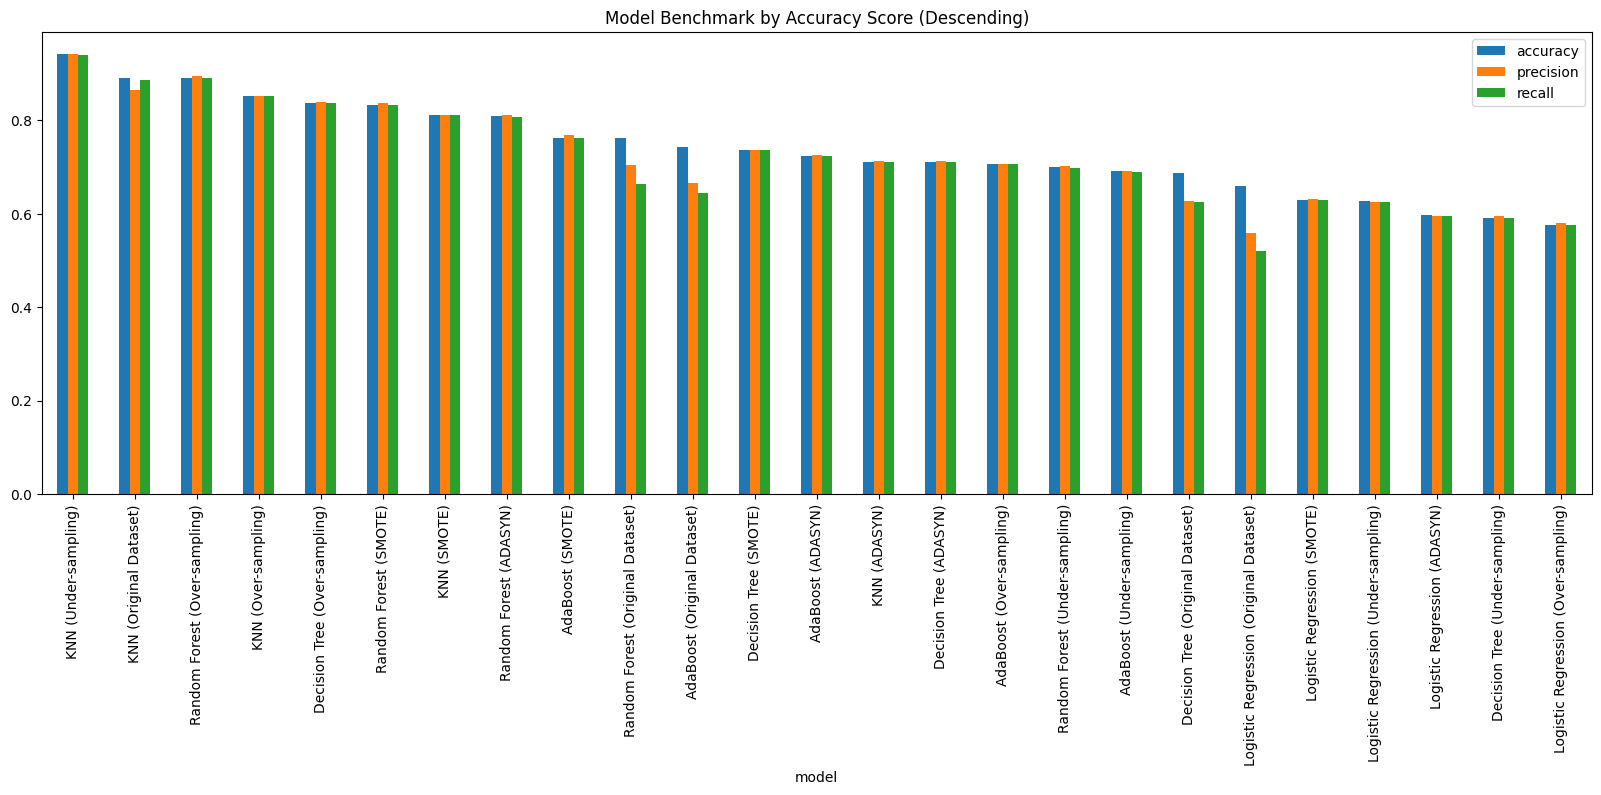

In [64]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='accuracy', ascending=False)
df_benchmark.plot(kind='bar', figsize=(20, 6))
plt.title('Model Benchmark by Accuracy Score (Descending)')
plt.show()


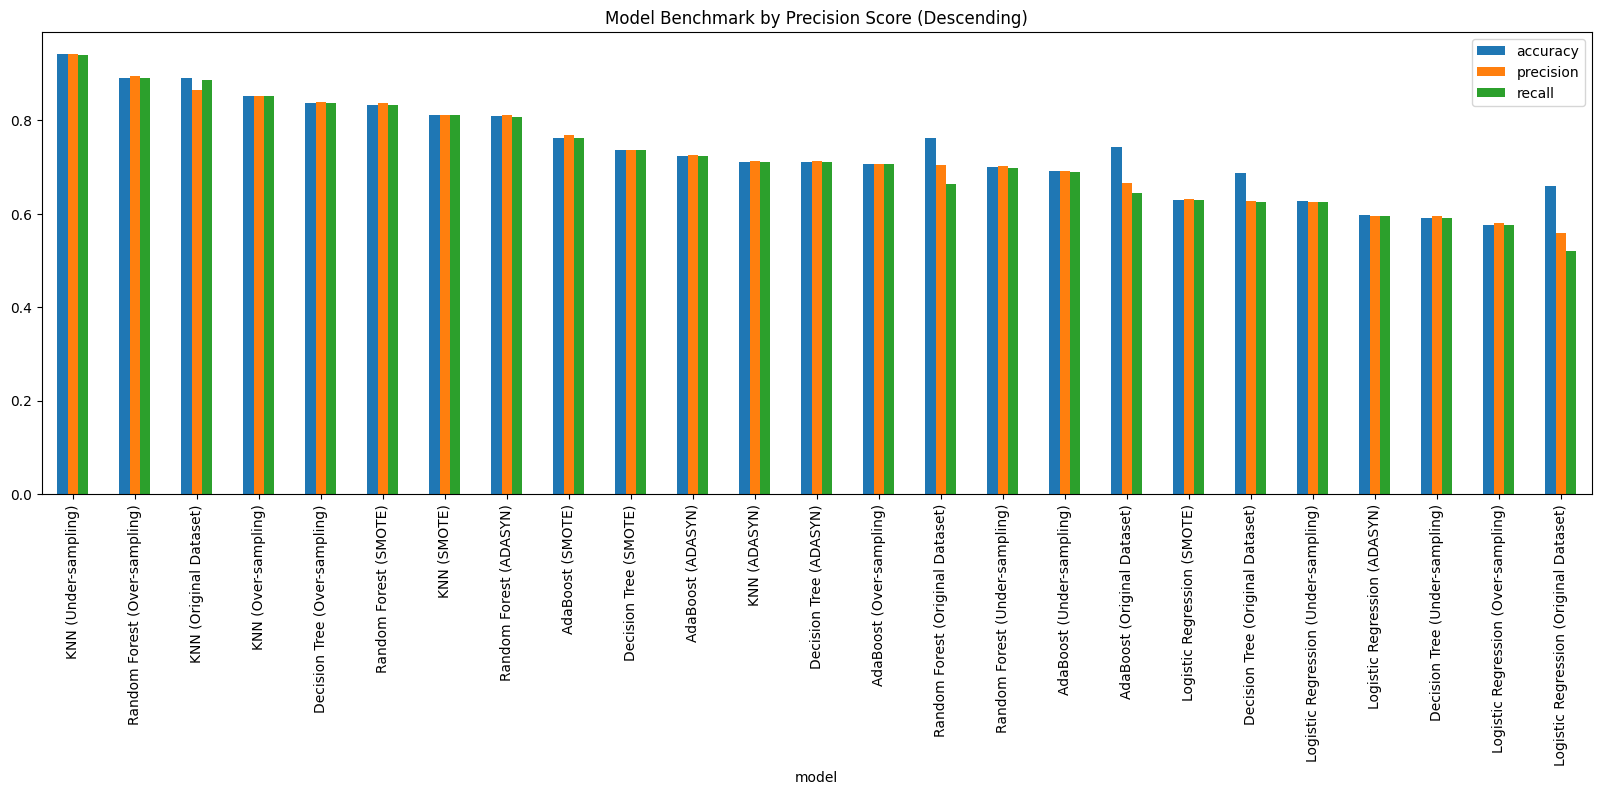

In [65]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='precision', ascending=False)
df_benchmark.plot(kind='bar', figsize=(20, 6))
plt.title('Model Benchmark by Precision Score (Descending)')
plt.show()


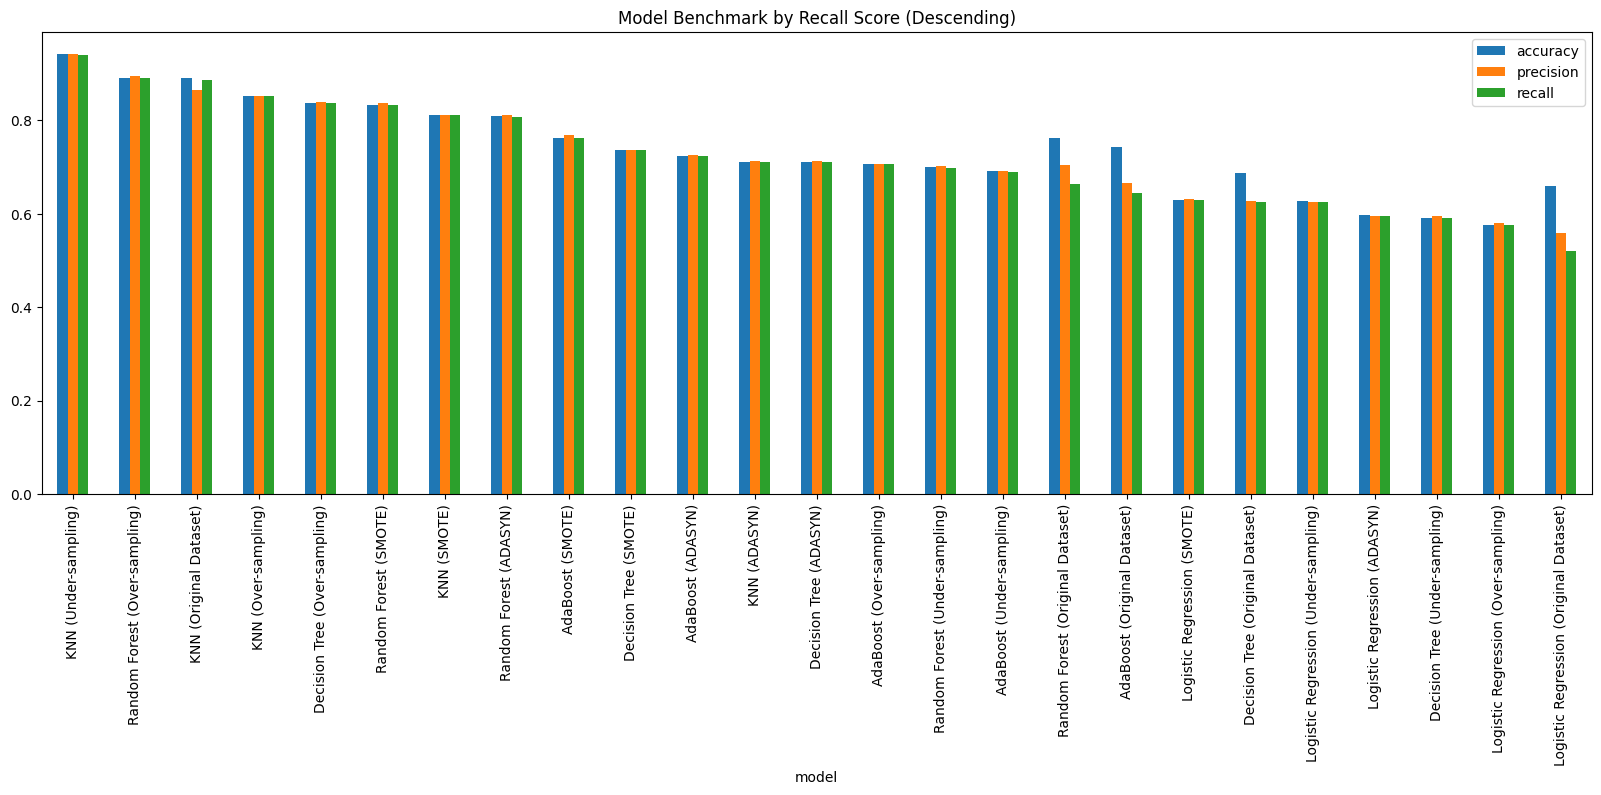

In [66]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='recall', ascending=False)
df_benchmark.plot(kind='bar', figsize=(20, 6))
plt.title('Model Benchmark by Recall Score (Descending)')
plt.show()